#Carga de la información

In [1]:
#importación de librerías a usar:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #librearía para hacer división de data

from sklearn.preprocessing import StandardScaler #librería para preprocesameinto, nomalización
from sklearn.ensemble import RandomForestClassifier #librería para entrenamr modelo de RF
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve #librerías para evaluación

In [2]:
#Carga del dataset

df1 = pd.read_csv("/content/dataset.csv")

In [3]:
df1.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [4]:
#cambiar el nombre de la columna que no tenía nombre en el archivo CSV

df1.columns= ['Id' if col == 'Unnamed: 0' else col for col in df1.columns]

In [5]:
df1.head()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [6]:
#estadística descriptiva
df1.describe()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,...,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000
mean,141459.804384,-0.193825,0.159880,-0.278411,0.193200,-0.128358,-0.048911,-0.202722,0.029468,-0.099865,...,0.033059,-0.003541,0.004062,-0.001630,-0.001130,0.011666,0.009332,0.005830,90.372956,0.041096
std,82409.871073,2.521772,1.970007,2.488454,1.746604,1.826802,1.371383,2.175403,1.764826,1.307587,...,1.071380,0.778235,0.654663,0.597398,0.531629,0.484641,0.464333,0.330659,289.206749,0.198526
min,104.000000,-31.972536,-42.172688,-31.103685,-5.047408,-28.815577,-8.389238,-43.557242,-41.044261,-13.320155,...,-22.797604,-8.887017,-17.530682,-2.822684,-4.547278,-1.577118,-7.263482,-3.916662,0.000000,0.000000
25%,70172.500000,-0.995027,-0.550039,-1.029977,-0.796602,-0.737594,-0.801558,-0.602338,-0.199438,-0.708590,...,-0.232682,-0.543785,-0.165239,-0.356176,-0.320517,-0.317820,-0.070511,-0.054776,5.000000,0.000000
50%,141476.000000,-0.081147,0.103165,0.112765,0.050026,-0.056608,-0.300839,0.031776,0.033797,-0.086823,...,-0.020227,0.007343,-0.012333,0.038141,0.013887,-0.035643,0.006109,0.012170,21.855000,0.000000
75%,213021.250000,1.291141,0.884756,1.012824,0.871857,0.616391,0.380007,0.558040,0.352100,0.583610,...,0.200228,0.528939,0.146370,0.428241,0.351934,0.270810,0.106617,0.083614,76.000000,0.000000
max,284764.000000,2.446505,22.057729,3.757300,12.132323,12.791416,21.190194,26.249717,20.007208,8.141560,...,27.202839,8.316275,13.218751,3.437028,3.590787,3.116200,5.058448,15.124103,12910.930000,1.000000


In [7]:
#ver tipo de datos, nulls
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      7300 non-null   int64  
 1   V1      7300 non-null   float64
 2   V2      7300 non-null   float64
 3   V3      7300 non-null   float64
 4   V4      7300 non-null   float64
 5   V5      7300 non-null   float64
 6   V6      7300 non-null   float64
 7   V7      7300 non-null   float64
 8   V8      7300 non-null   float64
 9   V9      7300 non-null   float64
 10  V10     7300 non-null   float64
 11  V11     7300 non-null   float64
 12  V12     7300 non-null   float64
 13  V13     7300 non-null   float64
 14  V14     7300 non-null   float64
 15  V15     7300 non-null   float64
 16  V16     7300 non-null   float64
 17  V17     7300 non-null   float64
 18  V18     7300 non-null   float64
 19  V19     7300 non-null   float64
 20  V20     7300 non-null   float64
 21  V21     7300 non-null   float64
 22  

In [8]:
#no hay valores nulls
df1.isnull().sum()

,0
Id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# Data clean

Tenemos 31 variables, id muestra identificador único del cliente, v1 a v28 muestra las transaciones de la tarjeta de crédito en los 28 días naturales, la columna Amount nos muestra el saldo de la tarjeta, y la columna Class nos muestra si fue fraude (1) o no (0).

Además, no tenemos valores nulos, así que podríamosa saltarnos el paso de rellenar valores vacíos.

In [9]:
# valores duplciados:

df1.duplicated().sum()

0

# Análisis exploratorio de la base (EDA)

In [10]:
df1.groupby('Class').describe()

Id                                                          \
        count           mean           std    min       25%       50%   
Class                                                                   
0      7000.0  142476.679571  82250.139326  104.0  71346.25  142291.5   
1       300.0  117732.716667  82708.520655  541.0  42780.25  110774.0   

                                V1            ...       V28             \
             75%       max   count      mean  ...       75%        max   
Class                                         ...                        
0      213743.00  284764.0  7000.0  0.010316  ...  0.076629  15.124103   
1      183338.75  281674.0   300.0 -4.957125  ...  0.371353   1.779364   

       Amount                                                              
        count        mean         std  min   25%    50%     75%       max  
Class                                                                      
0      7000.0   89.084347  290.626580  0.0  5.38  21.99   74.92  12910.93  
1       300.0  120.440500  252.395136  0.0  1.00  12.31  105.89   2125.87  

[2 rows x 240 columns]

In [76]:
df1.groupby('Class')['Amount'].describe()


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,7000.0,89.084347,290.626580,0.0,5.38,21.99,74.92,12910.93
1,300.0,120.440500,252.395136,0.0,1.00,12.31,105.89,2125.87


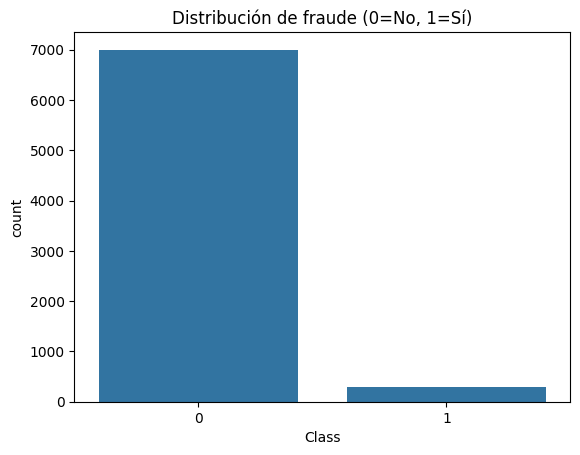

In [18]:
# Ver la distribución de la clase (Fraude:1 o no Fraude:0)
sns.countplot(x='Class', data=df1)
plt.title('Distribución de fraude (0=No, 1=Sí)')
plt.show()

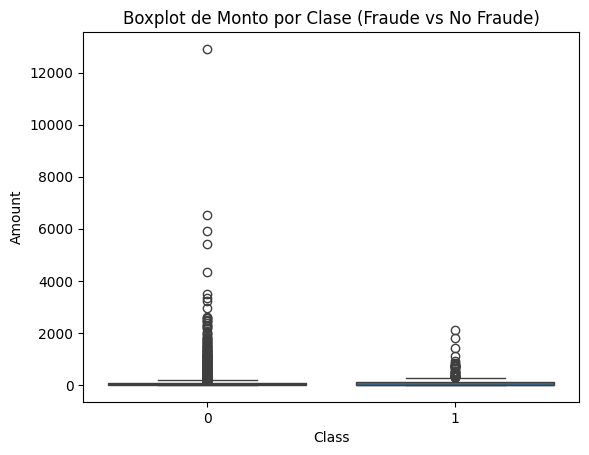

In [19]:
# Distribucción de las transacciones 0 y 1
sns.boxplot(x='Class', y='Amount', data=df1)
plt.title('Boxplot de Monto por Clase (Fraude vs No Fraude)')
plt.show()

* Vemos que hay más datos de la clase 0 (no fraude), por lo que podríamos decir que la base esta desbalanceado, 4% de fraude.
* Podemos observar que el monto promedio en los casos fraudulentos es mayor respecto al caso opuesto.
* Podemos observar que la variabilidad del saldo en la clase de fraudulenta suele operar en rango controlados para evitar activar aletar de sus cometidos.
* La mayoria de los fraudes parecen concentrarse en montos pequeños o medianos, lo que podría reflejar una estrategia para minimizar el riesgo de detección.

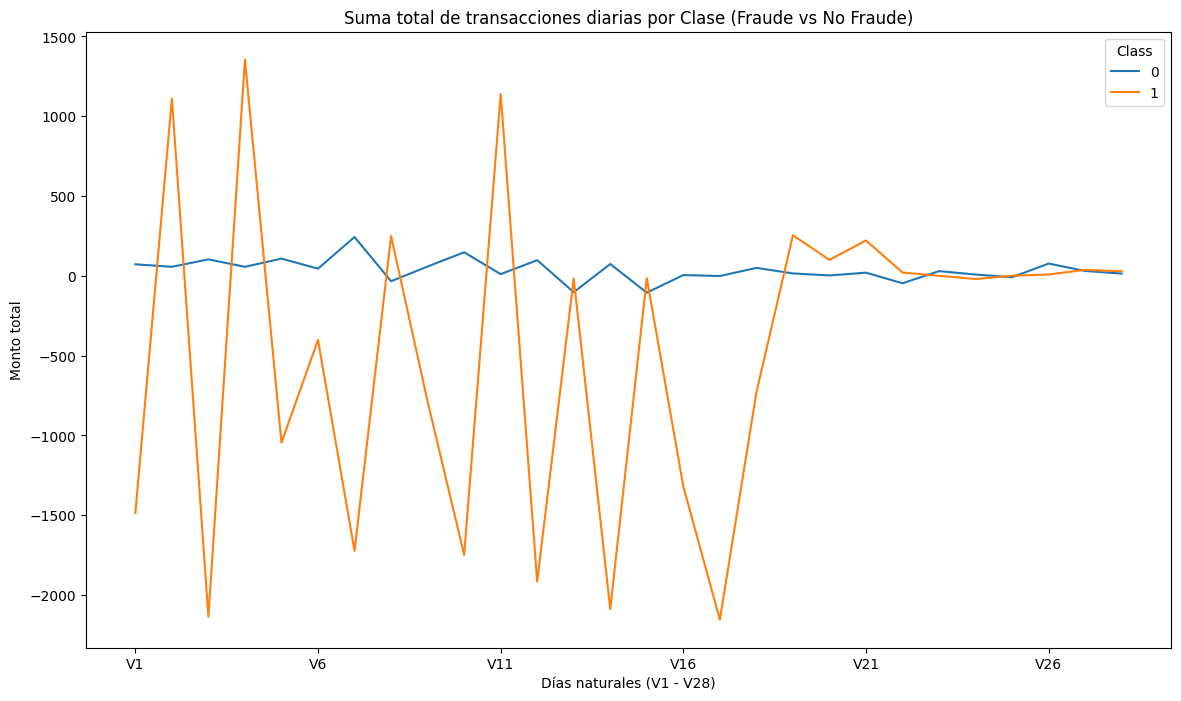

In [21]:
#suma de transacciones del mes por clase:
transacciones_totales = df1.groupby('Class').sum()[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]

# Graficar los resultados
transacciones_totales.T.plot(figsize=(14,8))
plt.title('Suma total de transacciones diarias por Clase (Fraude vs No Fraude)')
plt.xlabel('Días naturales (V1 - V28)')
plt.ylabel('Monto total')
plt.show()

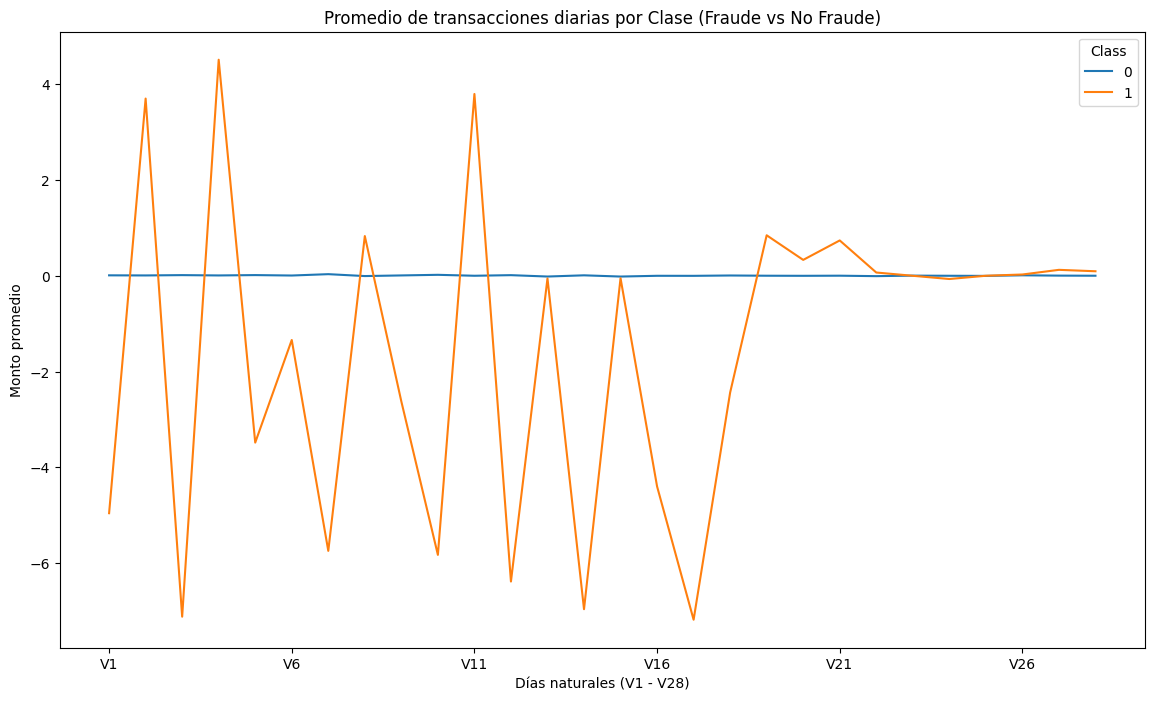

In [22]:
#Promedio de las transacciones diarias por clase
transacciones_promedio = df1.groupby('Class').mean()[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]

# Graficar los resultados
transacciones_promedio.T.plot(figsize=(14,8))
plt.title('Promedio de transacciones diarias por Clase (Fraude vs No Fraude)')
plt.xlabel('Días naturales (V1 - V28)')
plt.ylabel('Monto promedio')
plt.show()

De las dos gráficas anteriores podemos concluir:
* Las transacciones de la clase no fraudulenta tiene un comportamiento estable a lo largo de los días.
* La clase de fraude tiene fluctuaciones notables desde el día uno al 20, los últimos días del mes presenta comportamiento estable.
* Al parecer los defraudadores alternan entre montos altos y bajos para evitar detección de sistemas.
* La estabilidad promedio de la clase 0 respecto al comportamiento de la clase 1, puede ser utilizado como indicador para detectar transacciones fradulentes.

In [23]:
# Correlación entre las columnas continuas y clase; creo que no da mucha información
correlation = df1[['Amount', 'Class']].corr()
print(correlation)

          Amount     Class
Amount  1.000000  0.021524
Class   0.021524  1.000000


# Preprocesamiento de Datos


De acuerdo a lo visto anteriormente, podríamos usar el modelo de Randoms forest debido a que evita el sobreajuste, funciona bien con muchas variables independientes. Además, se debe considerar que típicamente el problema de fraude tiene más transacciones legítimas respecto a las transacciones fraudulentas (desbalanceo), justo el modelo de Random Forest puede manejarlo bien.

In [24]:
# ahora vamos a dividir en vi (X) y vd (y)
X = df1.drop(columns=['Class', 'Id']) #quitar las variables que no usaremos como vi
y = df1['Class']

# División de datos en testing y trainig


In [25]:
#generalmente se dividi 80% entrenamiento y 20% prueba, a veces es 70-30


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#vamos a normalizar los datos para este modelo, auque cabe señalar
# no es obligatorio debido a que el RF manipula bien datos con escala original


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo

In [27]:
#entrenamiento del modelo, usar 100 árboles, ponder semilla aleatoria estática

# aquí iniciamos el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#entrenamiento del modelo
rf_model.fit(X_train_scaled, y_train)

# aquí procedemos a predecir en los datos de prueba
y_pred = rf_model.predict(X_test_scaled)

In [28]:
print(y_pred) #las predicciones del modelo de RF, los 0 son No fraude, 1 son Fraude

[0 0 0 ... 0 0 0]


# Evaluación del modelo

Aquí usaremos métricas de precisión, recall y matriz de confusión para evaluar el rendimiento del modelo

In [29]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1401
           1       1.00      0.81      0.90        59

    accuracy                           0.99      1460
   macro avg       1.00      0.91      0.95      1460
weighted avg       0.99      0.99      0.99      1460



Precisión: mide exactitud de predicciones positivas
* Clase 0 (No fraude), el 99% de las prediccion de no fraude fueron correctas
* Clase 1 (Fraude), el 100% de las predicciones de fraude fueron correctas

Recall: de todos los fraudes reales, cuáles fueron correctamente idenficados?
* clase 0: el modelo identificó el 100 de los casos de no fraude
* calse 1: el modelo indentificó correctamente el 81% de los fraude reales

F1-Score: nos da el balance entre la presición y recall, útil para ver desbalanceo
* Calse 0: 100%
* clase 1: 90%, es bueno para el caso de desbalanceo

Acurracy: porcentaje de predicciones correctas en genera, de ambas clases
* el 99% de todas las predicciones fueron correctas

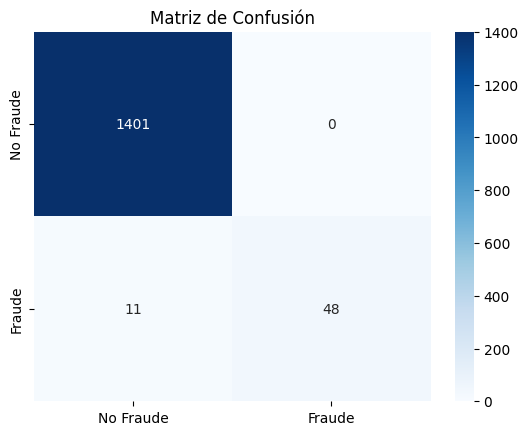

In [30]:
# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.title('Matriz de Confusión')
plt.show()

De la matriz anteriore concluimos:
* True negative: hubo 1401 No fraude identificados como no fraude.
* False positive: 0 transacciones clasificadas como Fraude cuando no era Fraude.
* Fase Negative: 11 transacciones clasificada como No Fraude cuando en realidad era Fraude.
* True Positive: 48 transacciones clasificadas como FRaude fueron clasficados como Fraude.

In [31]:
# AUC: este indicador muestra la capacidad del modelo de clasificar correctamente
  # la clase de Fraude y no Fraude. El número de 0.95 indica que el modelo tiene un
    # buen desempeño para distinguir una clase de otra.
y_prob = rf_model.predict_proba(X_test_scaled)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {roc_auc}")

AUC: 0.9588006145731257


In [86]:
#cabe señalar podemos ajustar los parámetros (númro de arboles=n_estimators y max_depth=profundidad max de los árboles)
# del modelo para encontrar un mejor modelo en caso de que no hayamos encontrado un modelo satisfactorio

# Pronóstico de nuevos datos

En el caso de que tenganmos nuevos datos podemo usar el modelo anterior, por ejmplo:

In [35]:

# aquí creo un df con las 29 varibales indept X (V1, V2, ..., Amount)
new_data = pd.DataFrame({
    'V1': [0.5, -0.4, 1.2],   # Ejemplo de valores para V1
    'V2': [-0.3, 0.8, -1.1],  # Ejemplo de valores para V2
    'V3': [0.7, -0.2, 0.5],   # Ejemplo de valores para V3
    'V4': [1.2, -0.7, 0.9],   # Ejemplo de valores para V4
    'V5': [-0.6, 0.5, -0.3],  # Ejemplo de valores para V5
    'V6': [0.3, -0.9, 0.4],   # Ejemplo de valores para V6
    'V7': [-0.1, 0.6, -0.8],  # Ejemplo de valores para V7
    'V8': [0.9, -0.4, 1.1],   # Ejemplo de valores para V8
    'V9': [0.4, 0.2, -0.5],   # Ejemplo de valores para V9
    'V10': [0.1, -0.6, 0.7],  # Ejemplo de valores para V10
    'V11': [-0.2, 0.9, -0.1], # Ejemplo de valores para V11
    'V12': [0.3, -0.5, 0.8],  # Ejemplo de valores para V12
    'V13': [-0.4, 0.1, -0.7], # Ejemplo de valores para V13
    'V14': [0.8, -0.8, 1.0],  # Ejemplo de valores para V14
    'V15': [-0.7, 0.3, -0.6], # Ejemplo de valores para V15
    'V16': [1.0, -0.2, 0.9],  # Ejemplo de valores para V16
    'V17': [0.6, -0.3, 0.5],  # Ejemplo de valores para V17
    'V18': [-0.5, 0.4, -0.9], # Ejemplo de valores para V18
    'V19': [0.2, -0.7, 0.6],  # Ejemplo de valores para V19
    'V20': [-0.3, 0.1, -0.4], # Ejemplo de valores para V20
    'V21': [0.7, -0.6, 0.3],  # Ejemplo de valores para V21
    'V22': [0.0, 0.2, -0.5],  # Ejemplo de valores para V22
    'V23': [0.5, -0.9, 0.8],  # Ejemplo de valores para V23
    'V24': [-0.6, 0.3, -0.7], # Ejemplo de valores para V24
    'V25': [0.1, -0.4, 0.9],  # Ejemplo de valores para V25
    'V26': [0.3, 0.1, -0.2],  # Ejemplo de valores para V26
    'V27': [-0.2, -0.8, 0.7], # Ejemplo de valores para V27
    'V28': [0.9, 0.6, -0.1],  # Ejemplo de valores para V28
    'Amount': [100.0, 250.0, 75.0]  # Ejemplo de valores para Amount
})

# Ver el DataFrame de ejemplo
print(new_data)

    V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V20  V21  V22  V23  \
0  0.5 -0.3  0.7  1.2 -0.6  0.3 -0.1  0.9  0.4  0.1  ... -0.3  0.7  0.0  0.5   
1 -0.4  0.8 -0.2 -0.7  0.5 -0.9  0.6 -0.4  0.2 -0.6  ...  0.1 -0.6  0.2 -0.9   
2  1.2 -1.1  0.5  0.9 -0.3  0.4 -0.8  1.1 -0.5  0.7  ... -0.4  0.3 -0.5  0.8   

   V24  V25  V26  V27  V28  Amount  
0 -0.6  0.1  0.3 -0.2  0.9   100.0  
1  0.3 -0.4  0.1 -0.8  0.6   250.0  
2 -0.7  0.9 -0.2  0.7 -0.1    75.0  

[3 rows x 29 columns]


In [40]:
# Escalar los nuevos datos
new_data_scaled = scaler.fit_transform(new_data)

# Realizar la predicción
predictions = rf_model.predict(new_data_scaled)

# Ver los resultados
print(f'Predicción para el nuevo dato usando el modelo Random Forest: {predictions}')


Predicción para el nuevo dato usando el modelo Random Forest: [0 1 0]


# Conclusión del modelo 1

A grandes rasgo, los defraudadores siguen un patron de transacciones entre un rango estrátegico para evitar ser detectado. Particularmente podemos ver que las transacciones ocurren entre los días 1 al 20 del mes, a finales del mes se estabilizan las transacciones.

De acuerdo a indicaodres antes vistos, elegimos el modelo de Random forest para detectar y prevenir casos de fraude:

* El modelo RF es robusto para temas de Fraude debido a que cuenta con gran capacidad para manejera datos desequilibrados.

* Cabe señalar que también se podría usar un modelo de logit regresion o redes nueronales, pero consideramos que las métricas del modelo son aceptables para este problema.

Particulamente, podemos obsevar que las metircas de evaluacion fueron muy buenas. Del modelo podemos decir que es muy preciso en la predicción de no fraude (Clase 0). Detecta casi todos los casos correctamente y tiene una precisión excelente de 99%. Para los casos de fraudes (Clase 1), el modelo es muy preciso, 100% de las predicciones de fraude son correctas, pero no logra detectar todos los casos de fraude (recall de 81%). En general, el modelo tiene un rendimiento excelente, con una exactitud total del 99%. Creo que es un bueno modelo y solición para detectar caso de fraude

#Segundo método: Isolation Forest

Adicional al modelo de Random Forest, podemos usar en paralelo el modelo Isolation Fores.

Este modelo de Machine learning está diseñado para la detección de anomalias. Es un modelo no supervisado que indetifica puntos/datos "anormales", como lo sería un caso de fraude.

El modelo se basa en el principio de que las anomalías (outliers) son puntos de datos más fáciles de aislar que los puntos normales debido a que el punto anormal está alejado del resto de datos y es menos frecuente verlos en la base.


##Pasos básicos:
Construcción del bosque:

* Se crean múltiples árboles binarios ("Isolation Trees") dividiendo aleatoriamente los datos.
* Los puntos anómalos tienden a aislarse más rápidamente (es decir, en menos divisiones).

Cálculo de puntuación:

* Cada punto recibe una puntuación de anomalía basada en el número promedio de divisiones necesarias para aislarlo.
* Las puntuaciones cercanas a 1 indican alta probabilidad de ser anomalías, mientras que las cercanas a 0 son normales.

In [65]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest #importación de librería
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [58]:
# carga de la base de datos


df2 = pd.read_csv("/content/dataset.csv")


In [59]:
df2.isnull().sum()

,0
Unnamed: 0,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [60]:
#Eliminar valores null

df2 = df2.dropna()

In [61]:
# Variables relevantes, las transacciones diarias más el AMOUNT
features = ['V' + str(i) for i in range(1, 29)] + ['Amount']
X = df2[features]  # Variables predictoras
y = df2['Class']   # Variable objetivo (fraude o no)

In [62]:
df2.columns= ['Id' if col == 'Unnamed: 0' else col for col in df2.columns]

In [66]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,...,0.051924,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44
1,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,...,-0.190851,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95
2,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,...,-0.163982,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40
3,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,...,0.080978,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20
4,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,...,-0.354008,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,0.014963,-2.856117,...,-0.478219,0.351792,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,101.50
7296,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,-2.895252,...,0.170872,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,30.30
7297,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,-2.248115,...,-0.025862,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72
7298,-1.141559,1.927650,-3.905356,-0.073943,-0.044858,-1.756999,-1.217416,0.364563,-2.770148,-3.216188,...,-0.250583,0.102081,-0.531496,-0.328741,0.393100,0.568435,0.786605,-0.146102,0.076211,25.00


In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      7300 non-null   int64  
 1   V1      7300 non-null   float64
 2   V2      7300 non-null   float64
 3   V3      7300 non-null   float64
 4   V4      7300 non-null   float64
 5   V5      7300 non-null   float64
 6   V6      7300 non-null   float64
 7   V7      7300 non-null   float64
 8   V8      7300 non-null   float64
 9   V9      7300 non-null   float64
 10  V10     7300 non-null   float64
 11  V11     7300 non-null   float64
 12  V12     7300 non-null   float64
 13  V13     7300 non-null   float64
 14  V14     7300 non-null   float64
 15  V15     7300 non-null   float64
 16  V16     7300 non-null   float64
 17  V17     7300 non-null   float64
 18  V18     7300 non-null   float64
 19  V19     7300 non-null   float64
 20  V20     7300 non-null   float64
 21  V21     7300 non-null   float64
 22  

In [69]:
# Normalización, opcional pero recomendable para Isolation Forest

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [70]:
X_scaled

array([[-0.39571846,  0.13631761,  0.77098879, ..., -0.70923068,
        -0.07039229, -0.21762033],
       [ 0.85677362, -0.30964819, -0.38185977, ..., -0.10443072,
        -0.23331884, -0.18819299],
       [ 0.68300978, -0.73917064, -0.24605971, ...,  0.07250722,
         0.06055988, -0.21430067],
       ...,
       [-0.06646681,  0.49424103, -1.08225202, ..., -0.02279151,
        -0.5703563 ,  1.34980869],
       [-0.37584633,  0.89740332, -1.45760947, ..., -0.33476968,
         0.21286697, -0.22605778],
       [-0.08962368, -0.66799179, -0.72905877, ..., -0.06611108,
         0.37281561,  1.24797145]])

In [71]:
# Entrenar modelo Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42) #100 árboles, 1% de anomalias en datos: fijar semilla de aleatoriedad
model.fit(X_scaled)

IsolationForest(contamination=0.01, random_state=42)

In [72]:
# Predicciones
# Isolation Forest asigna -1 a anomalías y 1 a datos normales
df2['anomaly_score'] = model.decision_function(X_scaled)  # Puntaje de anomalía
df2['anomaly'] = model.predict(X_scaled)


In [73]:
# Mapear valores de predicción: -1 (anomalía) a 1 (fraude simulado), 1 (normal) a 0 (no fraude)
df2['anomaly'] = df2['anomaly'].map({-1: 1, 1: 0})

In [74]:
# Evaluación del modelo usando la variable Class
print("Confusion Matrix:")
print(confusion_matrix(y, df2['anomaly']))
print("\nClassification Report:")
print(classification_report(y, df2['anomaly']))

Confusion Matrix:
[[6998    2]
 [ 229   71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7000
           1       0.97      0.24      0.38       300

    accuracy                           0.97      7300
   macro avg       0.97      0.62      0.68      7300
weighted avg       0.97      0.97      0.96      7300



In [75]:
# Opcional: Ver transacciones marcadas como anomalías
anomalies = df2[df2['anomaly'] == 1]
print(f"Número de anomalías detectadas: {len(anomalies)}")
print(anomalies.head())

Número de anomalías detectadas: 73
          Id         V1         V2         V3         V4         V5        V6  \
4447   46841 -23.712839 -42.172688 -13.320825   9.925019 -13.945538  5.564891   
6224  262839 -31.972536 -22.709113 -13.942635  12.132323 -12.217243  6.721727   
7002   15476 -21.209120  12.652197 -23.553933   6.174078 -16.026658 -4.422195   
7004   12108 -16.917468   9.669900 -23.736443  11.824990  -9.830548 -2.514829   
7005  152295 -17.537592  12.352519 -20.134613  11.122771 -14.571080 -0.381622   

             V7         V8        V9  ...        V23       V24       V25  \
4447  15.710644  -2.844253 -1.580725  ... -11.310338  0.404175 -4.547278   
6224   8.956141  -2.100171  5.795877  ... -14.078082  1.519264 -0.562652   
7002 -16.229444  14.116002 -3.922741  ...  -0.903860  0.130166  1.454857   
7004 -17.290657   1.820408 -6.264903  ...   1.241866 -1.051086  0.038009   
7005 -23.928661  -4.724921 -8.603038  ...   2.019128  0.627192 -1.085997   

           V26       